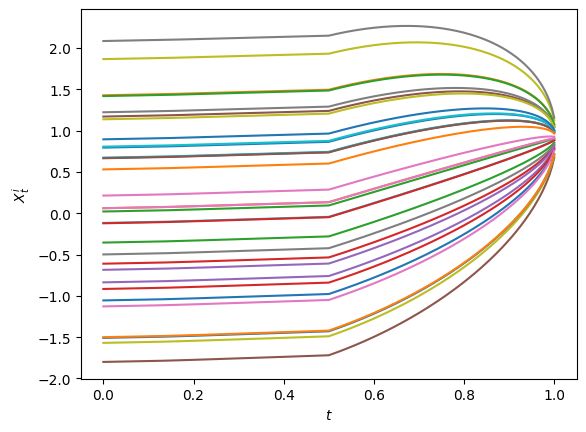

In [40]:
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda:0')
steps  = 201
m    = .9
p    = torch.tensor(.8)
sig  = 1/10
k    = 5
d    = 3000
bs   = 40
h    = torch.log(p/(1-p))/2
ts   = torch.linspace(0, 1, steps)
x    = torch.randn(d, bs, device=device)
xs   = [x]

tau  = lambda t: 2*k*t/d**(1/2) if t < 1/2 else k/d**(1/2) + (1-k/d**(1/2))*(2*t-1)
taup = lambda t: 2*k/d**(1/2) if t < 1/2 else (1-k/d**(1/2))*2
ones = torch.ones(d, device=device)

den  = lambda t: 1 + (sig**2-1)*tau(t)**2
bf   = lambda x, t: (sig**2-1)*tau(t)*taup(t)/den(t) * x + taup(t)/den(t) * m * torch.outer(ones, torch.tanh(h + tau(t) * m * ones @ x / den(t)))

for i, t in enumerate(ts[:-1]):
    #if i % 10 == 0: print(t)
    dt = ts[i+1] - ts[i]
    x = x + bf(x, t) * dt
    xs.append(x)

xs = torch.stack(xs)
plt.plot(np.linspace(0, 1, 201), xs[:, :32, 0].cpu().numpy());
plt.ylabel('$X_t^i$')
plt.xlabel('$t$')
plt.savefig('e.png')

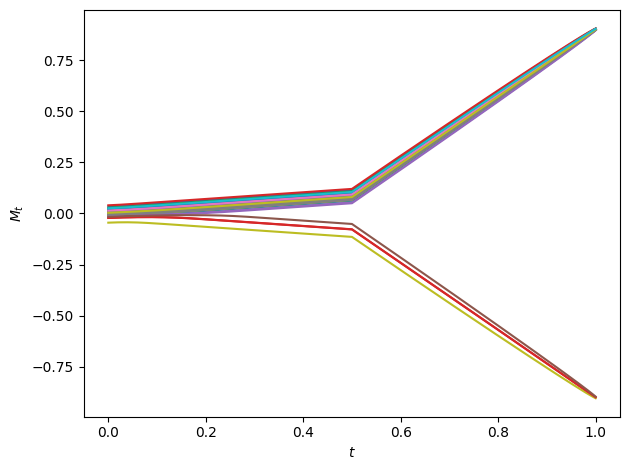

In [41]:
ms = xs.mean(1).cpu().numpy()
plt.plot(np.linspace(0, 1, 201), ms);
plt.ylabel(r'$M_t$')
plt.xlabel('$t$')
plt.tight_layout()
plt.savefig('f.png')
#plt.ylim(-.05,.05)

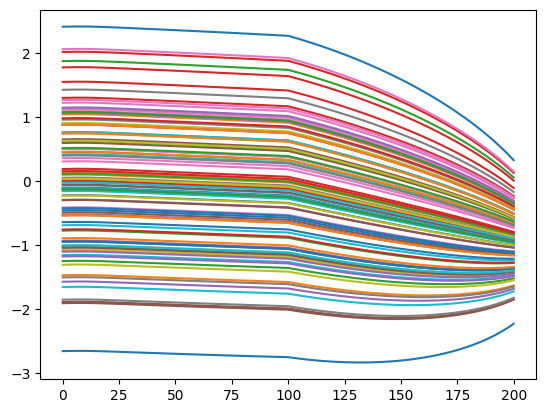

In [4]:
plt.plot(xs[:, :100, 0].cpu().numpy());

In [7]:
(ms[-1] > 0).mean()

np.float64(1.0)

In [8]:
torch.std(xs[-1, :, 0])

tensor(0.5053, device='cuda:0')